<a href="https://colab.research.google.com/github/besomlu/stock_study/blob/main/1_SPY%2C_QQQ_%EB%88%84%EC%A0%81%EC%9E%90%EC%82%B0%EB%B9%84%EC%9C%A8_%EA%B5%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.4 MB/s eta 0:00:00




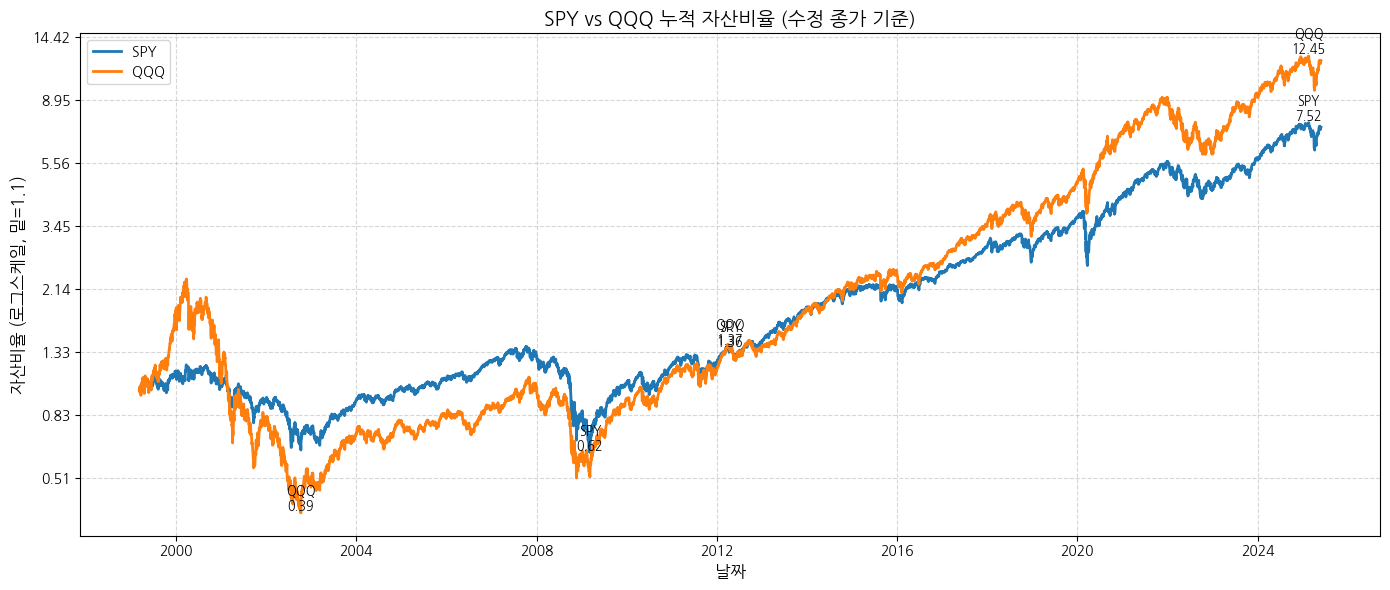

In [2]:
# 1. 필수 라이브러리 설치
!pip install -q finance-datareader
!apt -qq -y install fonts-nanum > /dev/null

# 2. 라이브러리 임포트 및 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

# 나눔고딕 폰트 설정
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for f in font_files:
    fm.fontManager.addfont(f)
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 3. SPY, QQQ 수정 종가 데이터 불러오기
start_date = '1999-01-01'
end_date = '2025-12-31'

spy = fdr.DataReader('SPY', start_date, end_date)[['Adj Close']].rename(columns={'Adj Close': 'SPY'})
qqq = fdr.DataReader('QQQ', start_date, end_date)[['Adj Close']].rename(columns={'Adj Close': 'QQQ'})

# 4. 공통 기간만 사용
df = pd.concat([spy, qqq], axis=1).dropna()

# 5. 상대 누적 자산비 계산 (첫날 기준 1로 정규화)
df = df / df.iloc[0]

# 6. 로그 스케일 그래프 (base=1.1) + 변곡점 표시
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['SPY'], label='SPY', linewidth=2)
plt.plot(df.index, df['QQQ'], label='QQQ', linewidth=2)

# 로그 스케일 y축 (base=1.1)
ax = plt.gca()
ax.set_yscale('log', base=1.1)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: f'{y:.2f}'))

# 주요 변곡점(최고/최저/중간날짜) 텍스트로 표시
for col in df.columns:
    series = df[col]
    highlight_dates = [series.idxmax(), series.idxmin(), series.index[len(series) // 2]]
    for dt in highlight_dates:
        value = series.loc[dt]
        plt.text(dt, value, f'{col}\n{value:.2f}', fontsize=9, ha='center', va='bottom')

plt.title('SPY vs QQQ 누적 자산비율 (수정 종가 기준)', fontsize=14)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('자산비율 (로그스케일, 밑=1.1)', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것. matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치 후, 사용하고 FinanceDataReader에도 Adj Close가 있으므로 SPY, QQQ ETF의 수정 종가(Adj Close)만을 불러올 것
3. 거래 기간은 1999년 1월 1일 ~ 2025년 12월 31일로 할 것. 두 종목 모두 데이터가 있는 기간만 처리할 것
4. 각 종목의 첫날을 1로 하여 상대적인 누적 자산비를 구할 것
5. 누적 자산에 대한 그래프로 출력할 때, y축은 자산비율로 변환하고 밑이 1.1인 로그 스케일 그래프로 그릴 것. y값의 주요 변곡 위치에서 표시할 것